<a href="https://colab.research.google.com/github/nabilanurfathiaalhaq/Image-Classification-Using-CNN/blob/main/bawang_merah_dan_bawang_putih.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os,shutil
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
base_dir = '/content/drive/MyDrive/Colab Notebooks/bawang merah vs bawang putih'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir, 'val')
bawangmerah_dir = os.path.join(base_dir,'bawang merah')
bawangputih_dir = os.path.join(base_dir, 'bawang putih')

In [ ]:
os.makedirs(train_dir, exist_ok=True)
os.makedirs(validation_dir, exist_ok=True)

In [ ]:
train_bawangmerah = os.path.join(train_dir, 'bawang merah')
train_bawangputih = os.path.join(train_dir, 'bawang putih')
val_bawangmerah = os.path.join(validation_dir, 'bawang merah')
val_bawangputih = os.path.join(validation_dir, 'bawang putih')

In [ ]:
os.mkdir(train_bawangmerah)
os.mkdir(train_bawangputih)
os.mkdir(val_bawangmerah)
os.mkdir(val_bawangputih)

In [ ]:
train_bawangmerah_dir, val_bawangmerah_dir = train_test_split(os.listdir(bawangmerah_dir), test_size = 0.40)
train_bawangputih_dir, val_bawangputih_dir = train_test_split(os.listdir(bawangputih_dir), test_size = 0.40)

In [ ]:
for file in train_bawangmerah_dir:
  shutil.copy(os.path.join(bawangmerah_dir, file), os.path.join(train_bawangmerah, file))
for file in train_bawangputih_dir:
  shutil.copy(os.path.join(bawangputih_dir,file), os.path.join(train_bawangputih,file))
for file in val_bawangmerah_dir:
  shutil.copy(os.path.join(bawangmerah_dir, file), os.path.join(val_bawangmerah,file))
for file in val_bawangputih_dir:
  shutil.copy(os.path.join(bawangputih_dir,file), os.path.join(val_bawangputih,file))

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=(0.8, 1.2),
    channel_shift_range=20,
    fill_mode='nearest'
)
test_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(100,100),
    batch_size= 32,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (100,100),
    batch_size = 32,
    class_mode = 'binary'
)

Found 252 images belonging to 2 classes.
Found 168 images belonging to 2 classes.


In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (100,100,3)),
  tf.keras.layers.MaxPooling2D(2,2),

  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),

  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dense(1, activation= 'sigmoid')
])

model.summary()
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 98, 98, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 49, 49, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 47, 47, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 21, 21, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 12800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 12800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │       6,554,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,647,873 (25.36 MB)

 Trainable params: 6,647,873 (25.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.97):
      print("\nAkurasi melewati 97%, hentikan proses training!")
      self.model.stop_training = True

callbacks = myCallback()

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch = 7, # 252 images = batch_size (32) * steps
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 5, # 168 images = batch_size (32) * steps
    verbose =2,
      callbacks=[callbacks]
)

Epoch 1/20
7/7 - 21s - 3s/step - accuracy: 0.5091 - loss: 0.8618 - val_accuracy: 0.5125 - val_loss: 0.6914
Epoch 2/20
7/7 - 9s - 1s/step - accuracy: 0.5938 - loss: 0.6742 - val_accuracy: 0.5000 - val_loss: 0.7155
Epoch 3/20
7/7 - 24s - 3s/step - accuracy: 0.5727 - loss: 0.6961 - val_accuracy: 0.7063 - val_loss: 0.6495
Epoch 4/20
7/7 - 4s - 619ms/step - accuracy: 0.6250 - loss: 0.6560 - val_accuracy: 0.5250 - val_loss: 0.6463
Epoch 5/20
7/7 - 16s - 2s/step - accuracy: 0.6409 - loss: 0.6631 - val_accuracy: 0.7500 - val_loss: 0.5683
Epoch 6/20
7/7 - 5s - 732ms/step - accuracy: 0.7500 - loss: 0.5978 - val_accuracy: 0.8813 - val_loss: 0.5276
Epoch 7/20
7/7 - 20s - 3s/step - accuracy: 0.7636 - loss: 0.4969 - val_accuracy: 0.8875 - val_loss: 0.3472
Epoch 8/20
7/7 - 5s - 658ms/step - accuracy: 0.7812 - loss: 0.4100 - val_accuracy: 0.9125 - val_loss: 0.3214
Epoch 9/20
7/7 - 21s - 3s/step - accuracy: 0.8661 - loss: 0.3276 - val_accuracy: 0.9750 - val_loss: 0.1350
Epoch 10/20
7/7 - 4s - 622ms/ste

In [ ]:
np.mean(history.history['val_accuracy'])

0.8503125041723252

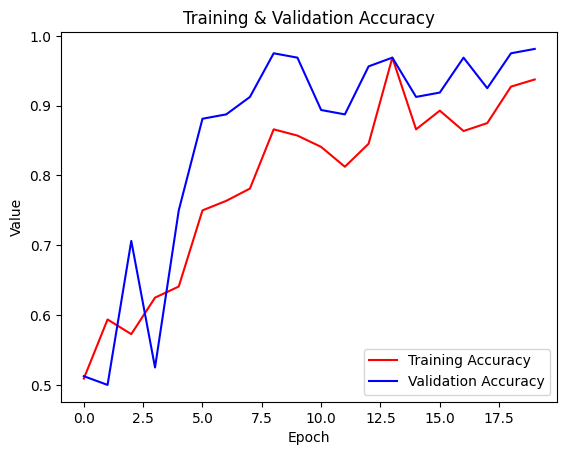

In [ ]:
# Plot train & validation accuracy
plt.plot(history.history['accuracy'], 'r', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], 'b', label='Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.show()

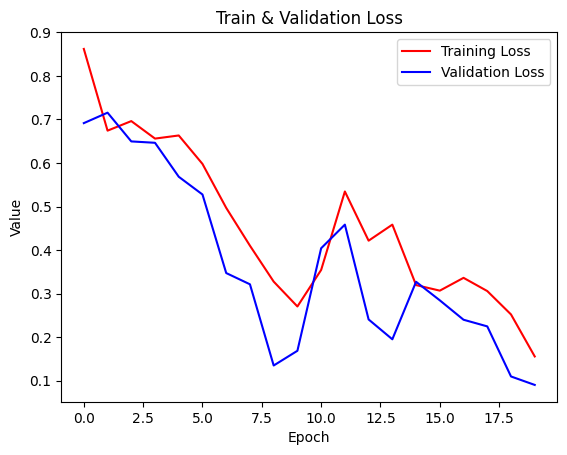

In [ ]:
# Plot train & validation loss
plt.plot(history.history['loss'], 'r', label='Training Loss')
plt.plot(history.history['val_loss'], 'b', label='Validation Loss')
plt.title('Train & Validation Loss')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()

In [ ]:
print(history.history['loss'])

[0.8618385195732117, 0.6741886734962463, 0.6961240172386169, 0.655958890914917, 0.6631177067756653, 0.597800612449646, 0.49685683846473694, 0.4100455939769745, 0.32758304476737976, 0.2704809308052063, 0.3543679416179657, 0.5344953536987305, 0.4215688109397888, 0.4583858847618103, 0.3196215033531189, 0.306823194026947, 0.3362239897251129, 0.3058956265449524, 0.2522030472755432, 0.15572945773601532]


Saving test1.jpg to test1 (3).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


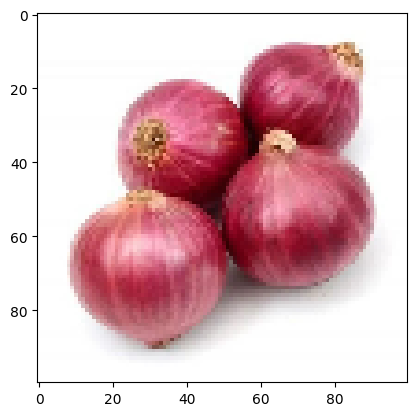

In [ ]:
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn
  img = image.load_img(path, target_size =(100,100))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

In [ ]:
# Classification results
print(fn)
if classes[0,0] > 0.5: # Check probability for 'Adas'
  print('Bawang Putih')
else:
  print('Bawang Merah')

test1 (3).jpg
Bawang Merah


Saving test2.jpg to test2.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


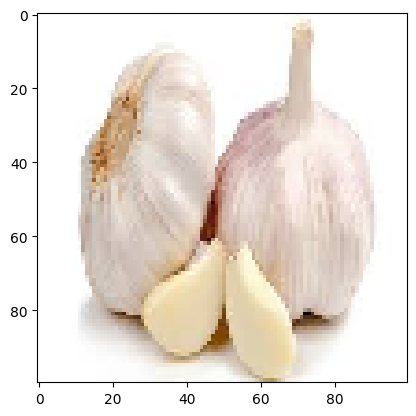

In [ ]:
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn
  img = image.load_img(path, target_size =(100,100))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

In [ ]:
# Classification results
print(fn)
if classes[0,0] > 0.5:
  print('Bawang Putih')
else:
  print('Bawang Merah')

test2.jpg
Bawang Putih


In [ ]:
saved_model_dir = 'save/model'
tf.saved_model.save(model, saved_model_dir)

converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
tflite_model = converter.convert()

with open('Klasifikasi_Gambar.tflite', 'wb') as f:
  f.write(tflite_model)

In [ ]:
model.save(f'Klasifikasi_Bawang_Merah_dan_Bawang_Putih_MobileNet.h5')